In [ ]:
#
# Udemy
# https://www.udemy.com/course/datascience365/learn/lecture/18051069#questions
#

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# uniformメソッドを使ってランダムなデータを作成
observations = 1000 # データの数を宣言
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# column_stackを使って二つのベクトルを行列にします
generated_inputs = np.column_stack((xs,zs))

# ノイズを足します
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# NPZ形式のファイルの読み込み
training_data = np.load('TF_intro.npz')

# 入力のサイズの定義
input_size = 2
# 出力のサイズの定義
output_size = 1

# モデルの作成
model = tf.keras.Sequential([
    # 'Dense'メソッドで線形結合を行っていきます
    tf.keras.layers.Dense(
        output_size,
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

# 今回はcustom optimizerを使って学習率を0.2に設定します
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 'compile'で最適化アルゴリズムと損失関数を指定していきます
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# データをモデルにフィットさせていきます
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

# 重みとバイアスを表示します
model.layers[0].get_weights()

# 変数に入れます
weights = model.layers[0].get_weights()[0]
weights

# 変数に入れます
bias = model.layers[0].get_weights()[1]
bias

# 入力データに対する予測の値を表示していきます
model.predict_on_batch(training_data['inputs']).round(1)

# ターゲットを表示します
training_data['targets'].round(1)

# 散布図を表示していきます
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

404

2

Epoch 1/8
13/13 [==============================] - 0s 891us/step - loss: 228.6104
Epoch 2/8
13/13 [==============================] - 0s 762us/step - loss: 101.0646
Epoch 3/8
13/13 [==============================] - 0s 804us/step - loss: 76.8477
Epoch 4/8
13/13 [==============================] - 0s 857us/step - loss: 72.7932
Epoch 5/8
13/13 [==============================] - 0s 749us/step - loss: 72.0007
Epoch 6/8
13/13 [==============================] - 0s 834us/step - loss: 74.2809
Epoch 7/8
13/13 [==============================] - 0s 957us/step - loss: 70.7167
Epoch 8/8
13/13 [==============================] - 0s 823us/step - loss: 74.7034


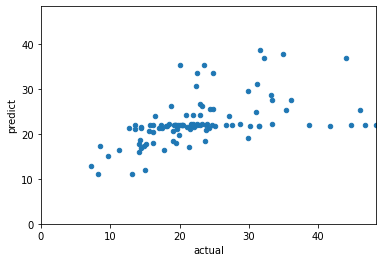

In [23]:
#
# boston
#

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python import keras as K

# ボストン市の住宅価格
dataset = load_boston()

# 入力と出力に分ける
y = dataset.target
x = dataset.data
x = x[:, 0:2]

# 訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# display(x_train)
# display(x_train[:, 0:2])
display(len(x_train))
display(len(x_train[0]))


model = K.Sequential([
    # データの正規化（入力は１３の特徴量）
    K.layers.BatchNormalization(input_shape=(2,)),
    # １層目のニューラルネットワーク
    #   活性化関数はsoftplus
    #   kernel_regularizer正則化=>重みに制限をかける=>過学習防止
    K.layers.Dense(units=2, activation="softplus", kernel_regularizer="l1"),
    # ２層目のニューラルネットワーク
    K.layers.Dense(units=1)
])
# loss=最小二乗法  optimizer=最適化に確率的勾配降下法
model.compile(loss="mean_squared_error", optimizer="sgd")

# 学習を行う（学習回数 epochs は８回）
model.fit(x_train, y_train, epochs=8)

# 予測を行う
predicts = model.predict(x_test)

result = pd.DataFrame({
    "predict": np.reshape(predicts, (-1,)),   # 2次元データを1次元データに変換
    "actual": y_test
})
limit = np.max(y_test)   # 最大値の取得

# 結果をグラフ表示する。
result.plot.scatter(x="actual", y="predict", xlim=(0, limit), ylim=(0, limit))
plt.show()

array([[1721, 1968],
       [ 952, 1956],
       [ 990, 1995],
       [1442, 1990],
       [1593, 2001],
       [1716, 1949],
       [1487, 1945],
       [1696, 1962],
       [1167, 1992],
       [1041, 1959]])

404

2

Epoch 1/8
13/13 [==============================] - 0s 928us/step - loss: 41206165504.0000
Epoch 2/8
13/13 [==============================] - 0s 842us/step - loss: 41206140928.0000
Epoch 3/8
13/13 [==============================] - 0s 829us/step - loss: 41206116352.0000
Epoch 4/8
13/13 [==============================] - 0s 856us/step - loss: 41206095872.0000
Epoch 5/8
13/13 [==============================] - 0s 838us/step - loss: 41206071296.0000
Epoch 6/8
13/13 [==============================] - 0s 860us/step - loss: 41206050816.0000
Epoch 7/8
13/13 [==============================] - 0s 818us/step - loss: 41206026240.0000
Epoch 8/8
13/13 [==============================] - 0s 1ms/step - loss: 41206001664.0000


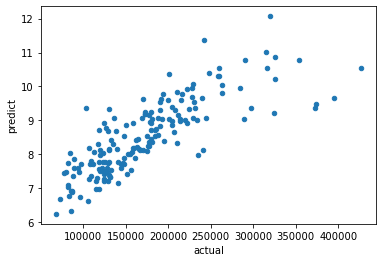

In [2]:
#
# lossがnanになるが、解決できない
#
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python import keras as K
import pandas as pd

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_info_rows', 6)

df_base = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv").loc[:577]
feature_names = ["GrLivArea", "YearBuilt"]
y_name = "SalePrice"
x = df_base.loc[:, feature_names].values
y = df_base[y_name].values


# 欠損値の確認
# df_sample = df_base.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
# display(df_sample.isnull().sum())

# 訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

display(x_train[:10])
display(len(x_train))
display(len(x_train[0]))

model = K.Sequential([
    # データの正規化（入力は１３の特徴量）
    K.layers.BatchNormalization(input_shape=(2,)),
    # １層目のニューラルネットワーク
    #   活性化関数はsoftplus
    #   kernel_regularizer正則化=>重みに制限をかける=>過学習防止
    K.layers.Dense(units=2, activation="softplus", kernel_regularizer="l1"),
    # ２層目のニューラルネットワーク
    K.layers.Dense(units=1)
])
# loss=最小二乗法  optimizer=最適化に確率的勾配降下法
model.compile(loss="mean_squared_error", optimizer="adam")

# 学習を行う（学習回数 epochs は８回）
model.fit(x_train, y_train, epochs=8)

# 予測を行う
predicts = model.predict(x_test)

result = pd.DataFrame({
    "predict": np.reshape(predicts, (-1,)),   # 2次元データを1次元データに変換
    "actual": y_test
})

# 結果をグラフ表示する。
result.plot.scatter(x="actual", y="predict")
plt.show()